In [1]:
import pandas as pd
import numpy as np
url = 'http://www.creditriskanalytics.net/uploads/1/9/5/1/19511601/hmeq.csv'
df = pd.read_csv(url)
import statistics
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


# 1. Tiền xử lý dữ liệu


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [3]:
df.describe()


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


# Mô tả dữ liệu:

BAD (=1) Hồ sơ vay là vi phạm hoặc mất khả năng trả nợ; (=0) hồ sơ vay đã và đang trả nợ.
LOAN Số tiền yêu cầu cho vay.
MORTDUE Số tiền đến hạn của khoản thế chấp hiện có.
VALUE Giá trị tài sản hiện tại.
REASON DebtCon = nợ hợp nhất; HomeImp = cải thiện nhà.
JOB Thể loại nghề nghiệp.
YOJ Số năm kinh nghiệm trong nghề nghiệp hiện tại.
DEROG Số lượng báo cáo không tín nhiệm.
DELINQ Số hạn mức tín dụng quá hạn.
CLAGE Tuổi của hạn mức tín dụng cũ nhất tính theo tháng.
NINQ Số câu hỏi tín dụng gần đây.
CLNO Số lượng hạn mức tín dụng.
DEBTINC Tỷ lệ nợ trên thu nhập.

# Đếm tỷ lệ missing theo từng cột 

In [4]:
def missing_data(data):
    # Count number of missing value in a column
    total = data.isnull().sum()           
    
    # Get Percentage of missing values
    percent = (data.isnull().sum()/data.isnull().count()*100)   
    temp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent(%)'])

    # Create a Type column, that indicates the data-type of the column.
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    temp['Types'] = types
    return(np.transpose(temp))

In [5]:
missing_data(df)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
Total,0,0,518,112,252,279,515,708,580,308,510,222,1267
Percent(%),0,0,8.69128,1.87919,4.22819,4.68121,8.64094,11.8792,9.73154,5.16779,8.55705,3.72483,21.2584
Types,int64,int64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64


# vẽ histogram từng biến

<AxesSubplot:title={'center':'Histogram plot of LOAN with 10 bins'}, xlabel='LOAN bins tickers', ylabel='Count obs in each LOAN bin'>

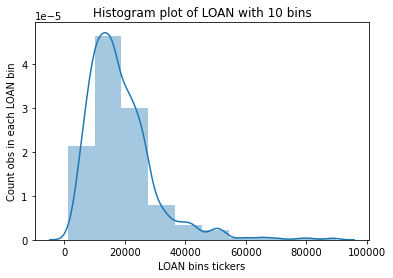

In [6]:
def plot_hist(data, col_name, bins=10):
    plot_data = data[col_name].dropna()
    
    xlabel = '{} bins tickers'.format(col_name)
    ylabel = 'Count obs in each {} bin'.format(col_name)
    title = 'Histogram plot of {} with {} bins'.format(col_name, bins)
    ax = sns.distplot(plot_data, bins=bins)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    return ax
plot_hist(df, 'LOAN')

<AxesSubplot:title={'center':'Barchart plot of JOB'}, xlabel='Group of JOB', ylabel='Count obs in JOB each bin'>

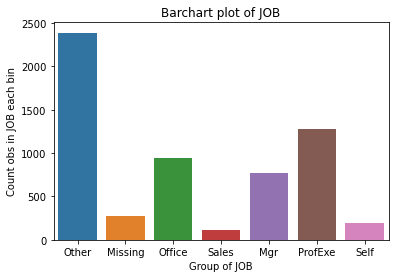

In [7]:
def plot_bar(data, col_name):
    plot_data = data[col_name].fillna('Missing')
    
    xlabel = 'Group of {}'.format(col_name)
    ylabel = 'Count obs in {} each bin'.format(col_name)
    title = 'Barchart plot of {}'.format(col_name)
    
    ax = sns.countplot(plot_data)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    return ax
plot_bar(df, 'JOB')

Text(0.5, 0.98, 'Visualization all fields')

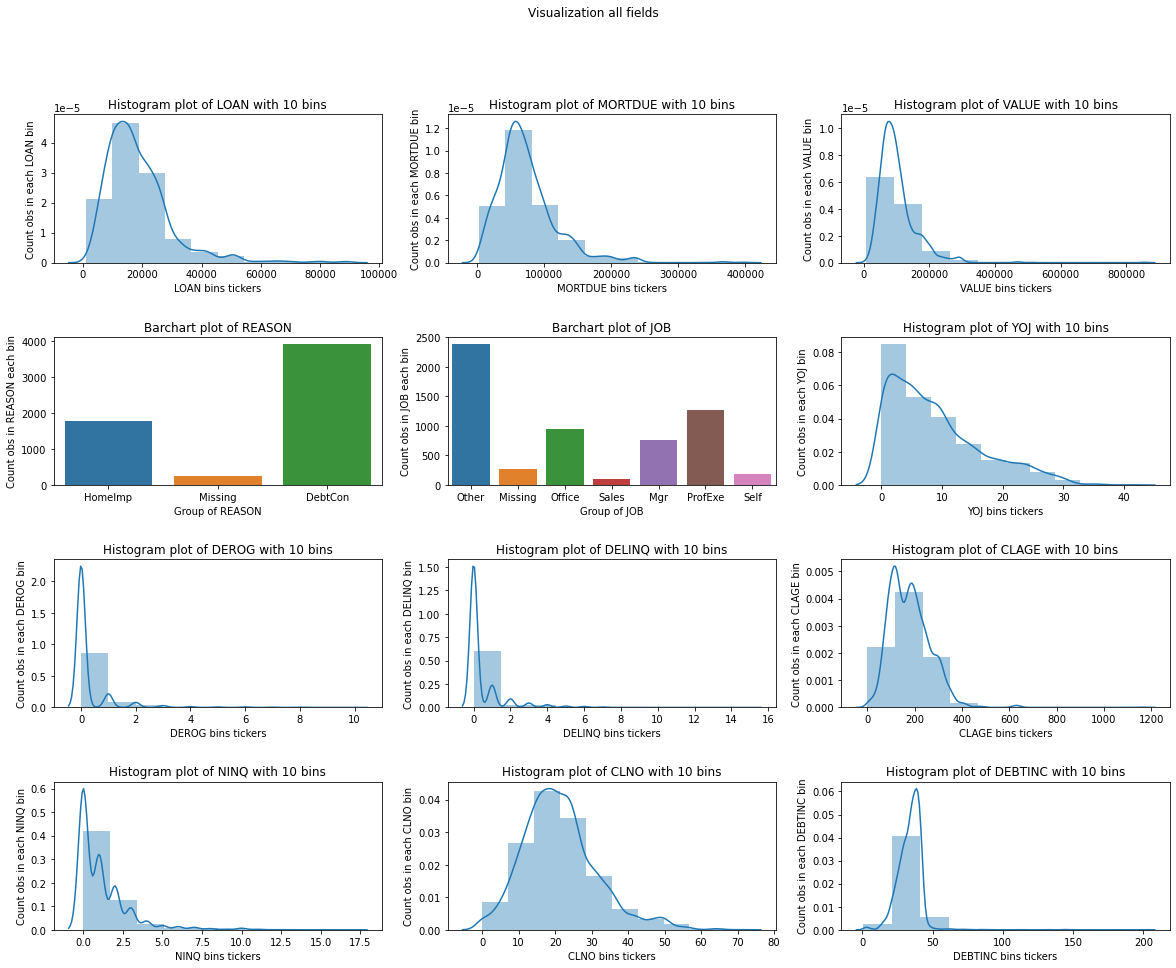

In [8]:
fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

for i, col_name in enumerate(df.columns[1:]):
    ax = fig.add_subplot(4, 3, i+1)
    if df[col_name].dtypes == 'object':
        plot_bar(df, col_name)
    else:
        plot_hist(df, col_name)

fig.suptitle('Visualization all fields')

# 2. Trích chọn đặc trưng
Chia các cột dữ liệu thành các bins:

Chia thông qua số lượng bins
Chia thông qua ngưỡng có sẵn
Chia theo các class của dữ liệu


In [9]:
df1 = df.copy()
df1

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [10]:
df1['GOOD'] = 1 - df1["BAD"]
df1

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,GOOD
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,0
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,0
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,0
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,1
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,1
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,1
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,1


In [11]:
for col_name in df1.columns[1:]:
    if df1[col_name].dtypes == 'object':
        df1[col_name].fillna('Missing', inplace=True)
    else:
        df1[col_name].fillna(df1[col_name].mean(), inplace=True)
df1.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,GOOD
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915,0
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915,0
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915,0
3,1,1500,73760.8172,101776.048741,Missing,Missing,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915,0
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915,1


In [12]:
def bin_table(data, col_name, n_bins=10):
    if df1[col_name].dtypes != 'object':
        bins, threshold = pd.qcut(df1[col_name], q=n_bins, retbins=True, duplicates='drop')
        threshold[0] = -np.inf
        threshold[-1] = np.inf
        bins, threshold = pd.cut(df1[col_name], bins=threshold, retbins=True)
        df1[col_name] = bins

In [13]:
#tính woe 
def WOE(data=None,col_name=None):
    pivoted = pd.DataFrame()
    pivoted.index.name = col_name   
    pivoted = pivoted.sort_values(by=col_name, ascending=False).reset_index(drop = True)
    pivoted.index.name = 'Bucket'
    pivoted['BAD']   =  df1.groupby(col_name)['BAD'].sum()
    pivoted['GOOD'] =   df1.groupby(col_name)['GOOD'].sum()
    pivoted['Obs'] = pivoted['GOOD'] + pivoted['BAD']
    pivoted['%Pop'] = pivoted['Obs']/pivoted['Obs'].sum()
    pivoted['Score'] = np.log(pivoted['GOOD']/pivoted['BAD'])
    pivoted['Mean'] = pivoted['Score']*pivoted['%Pop']/pivoted['%Pop'].sum()
    pivoted['GOOD/BAD'] = pivoted['GOOD']/pivoted['BAD']
    pivoted['%GOOD'] = pivoted['GOOD']/pivoted['GOOD'].sum()
    pivoted['%BAD'] = pivoted['BAD']/pivoted['BAD'].sum()
    pivoted['WoE'] = np.log(pivoted['%GOOD']/pivoted['%BAD'])
    pivoted['IV'] = (pivoted['%GOOD'] - pivoted['%BAD'])*pivoted['WoE']
    pivoted['IV_sum'] = pivoted['IV'].sum()
    #pivoted['STD'] = StandardScaler().fit_transform(pivoted[['Score']])
    pivoted['STD'] = statistics.stdev(pivoted['Score'])
    pivoted['Z-score']=  (pivoted['Score'] -pivoted['Mean'])/pivoted['STD']
    pivoted['Variable'] = col_name
    #df[col_name + '_STD'] = df[col_name].map(pivoted['Z-score'])
    df1[col_name + '_WoE'] = df1[col_name].map(pivoted['WoE'])
    df1[col_name + '_STD'] = df1[col_name].map(pivoted['STD'])
    return pivoted

In [14]:
for col_name in df.columns[1:]:
        bin_table(df, col_name)

In [15]:
#tạo data frame woe
WOE_df = pd.DataFrame()
for col_name in df1.columns[1:]:
    result = WOE(df1,col_name)
    WOE_df = pd.concat([WOE_df.reset_index(),result.reset_index()],ignore_index=True).set_index('Variable')
WOE_df
#result.to_excel("WOE.xlsx", index=False)

,index,Bucket,BAD,GOOD,Obs,%Pop,Score,Mean,GOOD/BAD,%GOOD,%BAD,WoE,IV,IV_sum,STD,Z-score
Variable,,,,,,,,,,,,,,,,
LOAN,NaN,"(-inf, 7600.0]",229.0,374.0,603.0,0.101174,0.490534,0.049630,1.633188,0.078390,0.192599,-0.898910,0.102663,0.160156,0.400990,1.099538
LOAN,NaN,"(7600.0, 10000.0]",137.0,471.0,608.0,0.102013,1.234877,0.125974,3.437956,0.098721,0.115223,-0.154566,0.002551,0.160156,0.400990,2.765411
LOAN,NaN,"(10000.0, 12100.0]",106.0,476.0,582.0,0.097651,1.501979,0.146670,4.490566,0.099769,0.089151,0.112535,0.001195,0.160156,0.400990,3.379904
LOAN,NaN,"(12100.0, 14400.0]",107.0,503.0,610.0,0.102349,1.547761,0.158412,4.700935,0.105429,0.089992,0.158318,0.002444,0.160156,0.400990,3.464795
LOAN,NaN,"(14400.0, 16300.0]",131.0,447.0,578.0,0.096980,1.227361,0.119029,3.412214,0.093691,0.110177,-0.162082,0.002672,0.160156,0.400990,2.763987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEBTINC,NaN,"(36.894, 38.956]",42.0,554.0,596.0,0.100000,2.579495,0.257950,13.190476,0.116118,0.035324,1.190052,0.096150,1.511125,1.048467,2.214228
DEBTINC,NaN,"(38.956, 40.904]",34.0,562.0,596.0,0.100000,2.805141,0.280514,16.529412,0.117795,0.028595,1.415698,0.126280,1.511125,1.048467,2.407922
DEBTINC,NaN,"(40.904, inf]",148.0,448.0,596.0,0.100000,1.107581,0.110758,3.027027,0.093901,0.124474,-0.281862,0.008618,1.511125,1.048467,0.950743


In [16]:
df1

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,CLAGE_WoE,CLAGE_STD,NINQ_WoE,NINQ_STD,CLNO_WoE,CLNO_STD,DEBTINC_WoE,DEBTINC_STD,GOOD_WoE,GOOD_STD
0,1,"(-inf, 7600.0]","(-inf, 28268.5]","(-inf, 49058.4]",HomeImp,Other,"(10.0, 14.0]","(-inf, 0.255]","(-inf, 1.0]","(85.31, 108.004]",...,-0.386975,0.514689,0.210721,0.584388,-0.484269,0.240145,-1.451001,1.048467,-inf,NaN
1,1,"(-inf, 7600.0]","(69529.0, 73760.817]","(61980.0, 70608.4]",HomeImp,Other,"(6.0, 8.0]","(-inf, 0.255]","(1.0, inf]","(108.004, 125.767]",...,-0.288596,0.514689,0.210721,0.584388,0.170345,0.240145,-1.451001,1.048467,-inf,NaN
2,1,"(-inf, 7600.0]","(-inf, 28268.5]","(-inf, 49058.4]",HomeImp,Other,"(2.0, 4.0]","(-inf, 0.255]","(-inf, 1.0]","(125.767, 151.588]",...,-0.302004,0.514689,0.210721,0.584388,-0.484269,0.240145,-1.451001,1.048467,-inf,NaN
3,1,"(-inf, 7600.0]","(69529.0, 73760.817]","(100748.8, 112004.2]",Missing,Missing,"(8.0, 8.922]","(-inf, 0.255]","(-inf, 1.0]","(178.076, 188.176]",...,-0.032257,0.514689,0.368415,0.584388,-0.048611,0.240145,-1.451001,1.048467,-inf,NaN
4,0,"(-inf, 7600.0]","(96205.8, 126562.0]","(100748.8, 112004.2]",HomeImp,Office,"(2.0, 4.0]","(-inf, 0.255]","(-inf, 1.0]","(85.31, 108.004]",...,-0.386975,0.514689,0.210721,0.584388,0.170345,0.240145,-1.451001,1.048467,inf,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,"(30500.0, inf]","(52271.2, 60537.0]","(90000.0, 100748.8]",DebtCon,Other,"(14.0, 20.0]","(-inf, 0.255]","(-inf, 1.0]","(211.273, 243.752]",...,0.311344,0.514689,0.210721,0.584388,0.170345,0.240145,1.045631,1.048467,inf,NaN
5956,0,"(30500.0, inf]","(52271.2, 60537.0]","(90000.0, 100748.8]",DebtCon,Other,"(14.0, 20.0]","(-inf, 0.255]","(-inf, 1.0]","(188.176, 211.273]",...,0.431992,0.514689,0.210721,0.584388,0.170345,0.240145,1.045631,1.048467,inf,NaN
5957,0,"(30500.0, inf]","(52271.2, 60537.0]","(90000.0, 100748.8]",DebtCon,Other,"(14.0, 20.0]","(-inf, 0.255]","(-inf, 1.0]","(211.273, 243.752]",...,0.311344,0.514689,0.210721,0.584388,0.170345,0.240145,1.045631,1.048467,inf,NaN
5958,0,"(30500.0, inf]","(43791.4, 52271.2]","(90000.0, 100748.8]",DebtCon,Other,"(10.0, 14.0]","(-inf, 0.255]","(-inf, 1.0]","(211.273, 243.752]",...,0.311344,0.514689,0.210721,0.584388,0.170345,0.240145,1.500928,1.048467,inf,NaN


In [17]:
df1 = df1.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
df1.drop(['GOOD_WoE'], axis = 1)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,DELINQ_STD,CLAGE_WoE,CLAGE_STD,NINQ_WoE,NINQ_STD,CLNO_WoE,CLNO_STD,DEBTINC_WoE,DEBTINC_STD,GOOD_STD
0,1,"(-inf, 7600.0]","(-inf, 28268.5]","(-inf, 49058.4]",HomeImp,Other,"(10.0, 14.0]","(-inf, 0.255]","(-inf, 1.0]","(85.31, 108.004]",...,1.362391,-0.386975,0.514689,0.210721,0.584388,-0.484269,0.240145,-1.451001,1.048467,0.0
1,1,"(-inf, 7600.0]","(69529.0, 73760.817]","(61980.0, 70608.4]",HomeImp,Other,"(6.0, 8.0]","(-inf, 0.255]","(1.0, inf]","(108.004, 125.767]",...,1.362391,-0.288596,0.514689,0.210721,0.584388,0.170345,0.240145,-1.451001,1.048467,0.0
2,1,"(-inf, 7600.0]","(-inf, 28268.5]","(-inf, 49058.4]",HomeImp,Other,"(2.0, 4.0]","(-inf, 0.255]","(-inf, 1.0]","(125.767, 151.588]",...,1.362391,-0.302004,0.514689,0.210721,0.584388,-0.484269,0.240145,-1.451001,1.048467,0.0
3,1,"(-inf, 7600.0]","(69529.0, 73760.817]","(100748.8, 112004.2]",Missing,Missing,"(8.0, 8.922]","(-inf, 0.255]","(-inf, 1.0]","(178.076, 188.176]",...,1.362391,-0.032257,0.514689,0.368415,0.584388,-0.048611,0.240145,-1.451001,1.048467,0.0
4,0,"(-inf, 7600.0]","(96205.8, 126562.0]","(100748.8, 112004.2]",HomeImp,Office,"(2.0, 4.0]","(-inf, 0.255]","(-inf, 1.0]","(85.31, 108.004]",...,1.362391,-0.386975,0.514689,0.210721,0.584388,0.170345,0.240145,-1.451001,1.048467,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,"(30500.0, inf]","(52271.2, 60537.0]","(90000.0, 100748.8]",DebtCon,Other,"(14.0, 20.0]","(-inf, 0.255]","(-inf, 1.0]","(211.273, 243.752]",...,1.362391,0.311344,0.514689,0.210721,0.584388,0.170345,0.240145,1.045631,1.048467,0.0
5956,0,"(30500.0, inf]","(52271.2, 60537.0]","(90000.0, 100748.8]",DebtCon,Other,"(14.0, 20.0]","(-inf, 0.255]","(-inf, 1.0]","(188.176, 211.273]",...,1.362391,0.431992,0.514689,0.210721,0.584388,0.170345,0.240145,1.045631,1.048467,0.0
5957,0,"(30500.0, inf]","(52271.2, 60537.0]","(90000.0, 100748.8]",DebtCon,Other,"(14.0, 20.0]","(-inf, 0.255]","(-inf, 1.0]","(211.273, 243.752]",...,1.362391,0.311344,0.514689,0.210721,0.584388,0.170345,0.240145,1.045631,1.048467,0.0
5958,0,"(30500.0, inf]","(43791.4, 52271.2]","(90000.0, 100748.8]",DebtCon,Other,"(10.0, 14.0]","(-inf, 0.255]","(-inf, 1.0]","(211.273, 243.752]",...,1.362391,0.311344,0.514689,0.210721,0.584388,0.170345,0.240145,1.500928,1.048467,0.0


# 3. TÍNH GINI TỪNG BIẾN

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from scipy import stats
import matplotlib.pyplot as plt
# %matplotlib inline

In [19]:
for col_name in df.columns[1:]:
    if df[col_name].dtypes == 'object':
        df[col_name].fillna('Missing', inplace=True)
    else:
        df[col_name].fillna(df[col_name].mean(), inplace=True)
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,Missing,Missing,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915


In [20]:
from sklearn import metrics
def gini_calculation(data, y, y_pred):
    auc_roc_score = metrics.roc_auc_score(y, y_pred)
    gini = 2 * auc_roc_score - 1
    data = {
         'Measure': ['Gini'],
           'Value': [gini]}
    data = pd.DataFrame(data)
    return data
gini_calculation(df, df['BAD'], df['LOAN'])
gini_calculation(df, df['BAD'], df['MORTDUE'])

,Measure,Value
0,Gini,-0.104996


In [21]:
#X = df1[[col_name for col_name in df1.columns if col_name.endswith('_WOE')]]
# X = df.iloc[0:4]
# gini_result = pd.DataFrame()
# for col_name in X.columns[1:]:
#     result = gini_calculation(X, X['BAD'], X[col_name])
#     gini_result = pd.concat([gini_result,result],ignore_index=True)
#     gini_result.reset_index(drop=True, inplace=True)
# gini_result

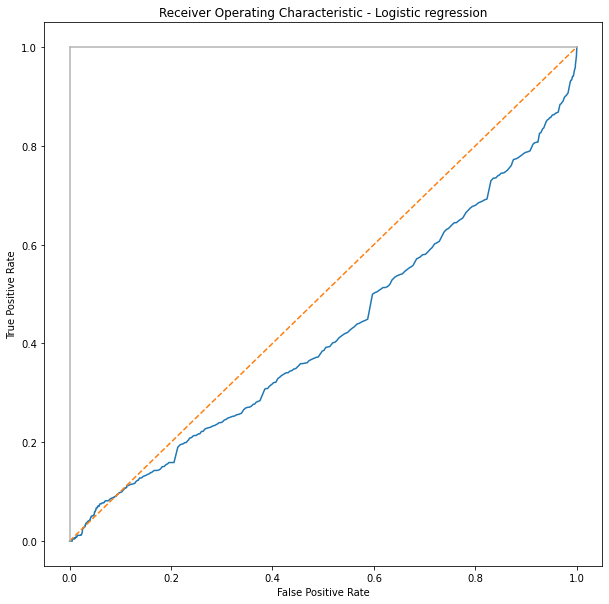

In [22]:


false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(df['BAD'], df['LOAN'])

#DRAW CURVE
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#gini = 2 * roc_auc_score(df['BAD'], df['LOAN_STD']) - 1
#ks = stats.ks_2samp(df[df['BAD'] == 0]['LOAN_STD'], df[df['BAD'] == 1]['LOAN_STD']).statistic
#print('GINI = %s, KS = %s' % (gini, ks))
   

In [23]:
# fig = plt.figure(figsize=(20, 15))
# fig.subplots_adjust(hspace=0, wspace=0)
# for i, col_name in enumerate(X.columns[0:]):
#     ax = fig.add_subplot(4, 3, i+1)
#     plot_roc_curve(df['BAD'], df[col_name])

# fig.suptitle('Visualization all fields')

In [24]:
def plot_roc_curve(data, col_name):
    false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(df['BAD'], df[col_name])
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - Logistic regression  of {}'.format(col_name))
    plt.plot(false_positive_rate2, true_positive_rate2)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return plt

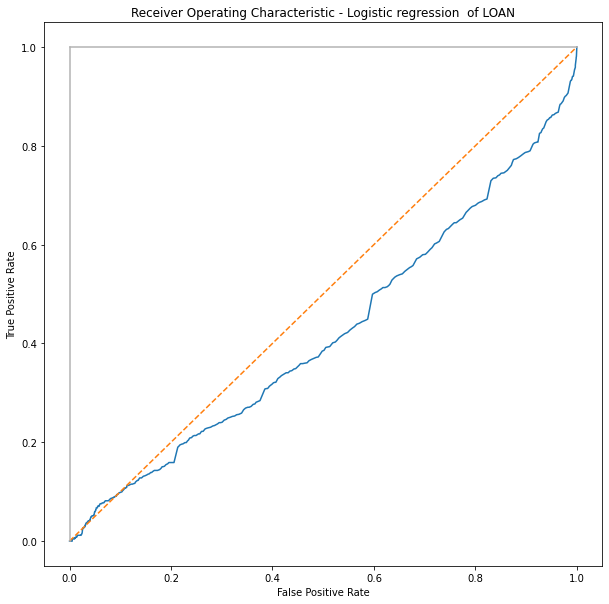

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [25]:
plot_roc_curve(df, 'LOAN')

<Figure size 1440x1080 with 0 Axes>

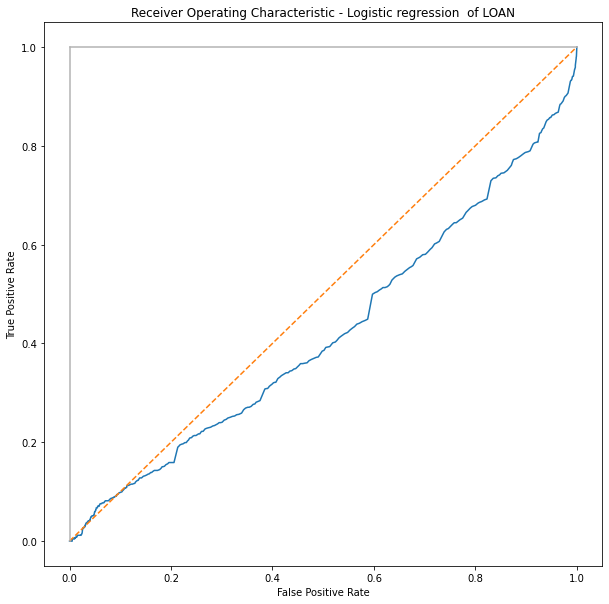

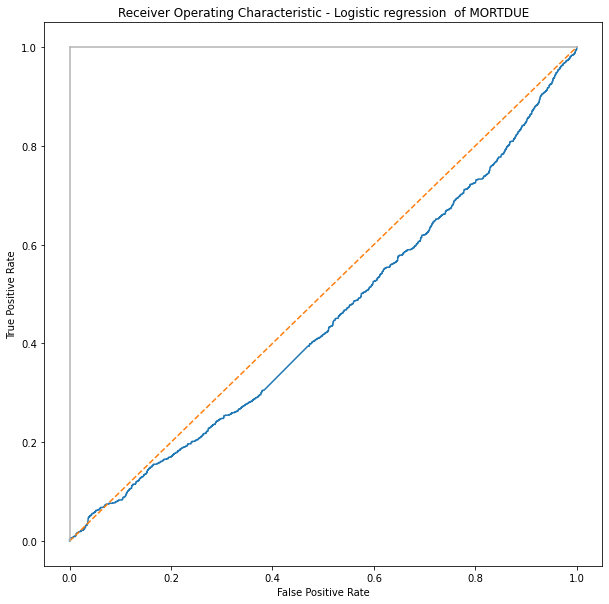

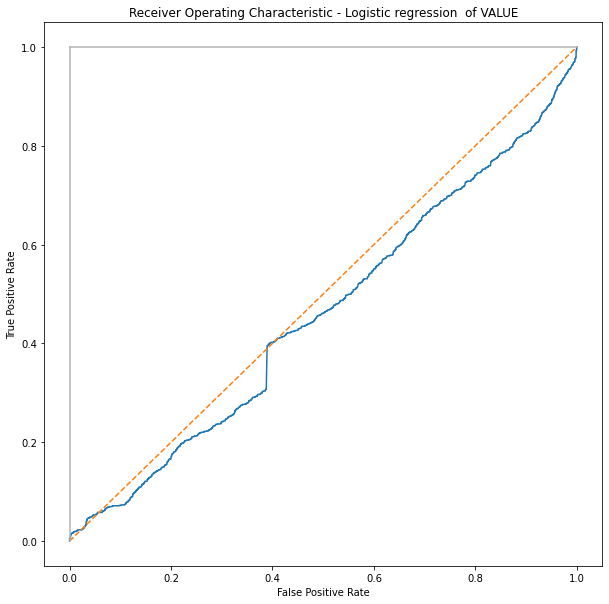

Text(0.5, 0.98, 'Visualization all fields')

In [26]:
fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

for i, col_name in enumerate(df.columns[1:4]):
        plot_roc_curve(df, col_name)
         
fig.suptitle('Visualization all fields')

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split # Dùng để tách dữ liệu ra làm 2 phần: 1 phần là để dựng mô hình (train model), 1 phần là để kiểm chứng mô hình (test model)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix # Đo lường độ chính xác của mô hình

# 4. XÂY DỰNG MÔ HÌNH

In [58]:
model = LogisticRegression(max_iter=1000) # iteration # Thiết lập mô hình

In [59]:
Y = df1['BAD']
X = df1[[col_name for col_name in df1.columns if col_name.endswith('_WoE')]]

In [60]:
model.fit(X,Y) # Xây dựng mô hình

LogisticRegression(max_iter=1000)

In [61]:
betas_dict = dict(zip(list(X.columns), model.coef_[0]))
alpha = model.intercept_[0]

In [62]:
coefficient = pd.DataFrame(list(betas_dict.items()),columns = ['Bien X','Coef'])
coefficient.reset_index(drop=True, inplace=True)
coefficient

,Bien X,Coef
0,LOAN_WoE,-0.518719
1,MORTDUE_WoE,-0.566318
2,VALUE_WoE,-0.657295
3,REASON_WoE,-0.643631
4,JOB_WoE,-0.766798
5,YOJ_WoE,-0.690560
6,DEROG_WoE,-0.730218
7,DELINQ_WoE,-0.931862
8,CLAGE_WoE,-0.907423
9,NINQ_WoE,-0.581542


In [63]:
#dùng thư viên khác 
import statsmodels.api as sm

model = sm.OLS(Y,X)
results = model.fit()
results_summary = results.summary()

# Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
results_as_html = results_summary.tables[1].as_html()
pd.read_html(results_as_html, header=0, index_col=0)[0]

,coef,std err,t,P>|t|,[0.025,0.975]
LOAN_WoE,-0.0494,0.015,-3.242,0.001,-0.079,-0.020
MORTDUE_WoE,-0.0402,0.025,-1.578,0.115,-0.090,0.010
VALUE_WoE,-0.0417,0.016,-2.678,0.007,-0.072,-0.011
REASON_WoE,-0.0334,0.062,-0.537,0.591,-0.155,0.089
JOB_WoE,-0.0283,0.015,-1.897,0.058,-0.057,0.001
YOJ_WoE,-0.0292,0.021,-1.409,0.159,-0.070,0.011
DEROG_WoE,-0.0871,0.011,-8.262,0.000,-0.108,-0.066
DELINQ_WoE,-0.1057,0.010,-10.489,0.000,-0.125,-0.086
CLAGE_WoE,-0.0416,0.011,-3.647,0.000,-0.064,-0.019
NINQ_WoE,-0.0516,0.015,-3.402,0.001,-0.081,-0.022
